<a id='head'></a>
# Телеком

## Оглавление
 
- [**Введение**](#intro)
    - [Входные данные](#input_data)
    - [Задачи проекта](#purpose)
    
- [**1. План проекта**](#part_1)
    - [1.1 Вопросы заказчику](#part_1_1)
    - [1.2 План работ](#part_1_2)

- [**2. Анализ данных**](#part_2)
    - [2.1 Импорт библиотек и таблиц](#part_2_1)
    - [2.2 Предварительный обзор данных](#part_2_2)
        - [Выводы](#conclusions_2_2)
    - [2.3 Предобработка](#part_2_3)
    - [2.4 Исследовательсткий анализ данных](#part_2_4)

- [**3. Построение моделей**](#part_3)
    - [3.1 Подготовка датасета](#part_3_1)
    - [3.2 Анализ признаков](#part_3_2)
    - [3.3 Подготовка выборок](#part_3_3)
    - [3.4 Кодирование и масштабирование признаков](#part_3_4)
    - [3.5 Функции для обучения](#part_3_5)
    - [3.6 Обучение моделей](#part_3_6)
    - [3.7 Результаты обучения](#part_3_7)
    - [3.8 Тестирование лучшей модели](#part_3_8)
    - [3.9 Выводы](#part_3_9)

- [**4. Отчет**](#part_4)
    - [4.1 Введение](#part_4_1)
    - [4.2 План](#part_4_2)
    - [4.3 Подготовка](#part_4_3)
    - [4.4 Трудности](#part_4_4)
    - [4.5 Модели](#part_4_5)
    - [4.6 Результаты тестирования](#part_4_6)
    - [4.7 Выводы](#part_4_7)
    
    

<a id='intro'></a>
# Введение [▴](#head)

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

<a id='input_data'></a>
## Входные данные [▴](#head)

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. **Стационарную телефонную связь.** Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. **Интернет.** Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (**`Fiber optic`**).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (**`DeviceProtection`**) и блокировка небезопасных сайтов (**`OnlineSecurity`**);
- Выделенная линия технической поддержки (**`TechSupport`**);
- Облачное хранилище файлов для резервного копирования данных (**`OnlineBackup`**);
- Стриминговое телевидение (**`StreamingTV`**) и каталог фильмов (**`StreamingMovies`**).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на `1 февраля 2020`.

<a id='purpose'></a>
## Задачи проекта [▴](#head)

- Необходимо построить прототип модели машинного обучения, которая будет работать с качеством показателя `AUC-ROC` не ниже `0.75`
- Описать модель для воспроизводимости результата.

<a id='part_1'></a>
# 1. План проекта [▴](#head)

<a id='part_1_1'></a>
## 1.1 План работ  [▴](#head)

- **Вопросы заказчику.**
    - в исходных материалах недостаточно информации для качественного решения задачи. Необходимо задать дополнительные вопросы заказчику.
- **Анализ данных**
    - импорт необходимых библиотек и таблиц
    - предварительное знакомство с данными, анализ пропусков, дублей и т.п.
    - предобработка (заполнение пропусков, приведение данных к нужным типам)
    - исследовательский анализ данных
- **Объединение датасета**
- **Создание обучающей и тестовой выборок**
    - создание выборок
    - подготовка категориальных признаков
    - балансировка классов (если понадобится)
- **Создание функций для оптимизации обучения моделей. Функции решат следующие вопросы:**
    - оптимизируют количество кода
    - посчитают время обучения моделей
    - соберут результаты тестирования моделей
- **Запуск обучения**
    - сравнение результатов
    - выбор модели с лучшими показателями по качеству/скорости работы
- **Тестирование лучшей модели**
- **Финальный отчет**


<a id='part_1_2'></a>
## 1.2 Вопросы заказчику[▴](#head)

В исходных данных недостаточно информации для качественного решения задачи. 

От заказчика дополнительно были получены следующие ответы (в процессе созвона с тим лидом)

**Критерии оценки и воспроизводимость результатов**

Вопрос|Ответ
-|-
Основная метрика |`AUC-ROC`
Дополнительная метрика|`Accuracy`
Параметр для воспроизводимости результатов|`random_state=281122`

- `0.00 < AUC-ROC < 0.75` — 0 sp
- `0.75 ≤ AUC-ROC < 0.81` — 4 sp
- `0.81 ≤ AUC-ROC < 0.85` — 4.5 sp
- `0.85 ≤ AUC-ROC < 0.87` — 5 sp
- `0.87 ≤ AUC-ROC < 0.88` — 5.5 sp
- `0.88 ≤ AUC-ROC` — 6 sp

**Дополнительные данные по параметрам:**

- `BeginDate` – дата начала пользования услугами,
- `EndDate` – дата окончания пользования услугами,
- `Type` – тип оплаты: ежемесячный, годовой и тд,
- `PaperlessBilling` – электронный платёжный документ,
- `PaymentMethod` – способ оплаты,
- `MonthlyCharges` – ежемесячные траты на услуги,
- `TotalCharges` – всего потрачено денег на услуги
- `Dependents` – наличие иждивенцев
- `SeniorCitizen` – наличие пенсионного статуса по возрасту
- `Partner` – наличие супруга(и)
- `MultipleLines` – наличие возможности ведения параллельных линий во время звонка

<a id='part_2'></a>
# 2. Анализ данных [▴](#head)

<a id='part_2_1'></a>
## 2.1 Импорт библиотек и таблиц [▴](#head)

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve

Для воспроизводимости кода на локальном компьютере и облаке применим конструкцию `try... except...`

In [2]:
try: # локально
    contract = pd.read_csv('datasets/contract.csv')
    personal = pd.read_csv('datasets/personal.csv')
    internet = pd.read_csv('datasets/internet.csv')
    phone = pd.read_csv('datasets/phone.csv')
except: # в облаке
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

Датасетам дадим имена, для удобного вызова в функции.

In [3]:
contract.name = 'contract'
personal.name = 'personal'
internet.name = 'internet'
phone.name = 'phone'

### Установка параметров

In [4]:
full_start = time.time() # Таймер, который покажет время выполнения всей тетрадки
plt.rcParams.update({'font.size':12}) # зададим размер шрифта по умолчанию для графиков

rs_all = 281122 # random_state который будет указан по всей тетрадке

<a id='part_2_2'></a>
## 2.2 Предварительный обзор данных [▴](#head)

Для первого знакомства с данными напишем функцию.

In [5]:
def overview(o_df):
   
    plt.figure(figsize=(20,0.1))
    plt.title(f'Таблица: {o_df.name}', {'fontsize': 30})
    plt.axis('off')
    plt.show()
    
    print(f'\nОбщий вид\n{"_" * 100}')
    display(o_df)
    
    print(f'\nОбщая информация:\n{"_" * 100}')
    o_df.info()
    
    print(f'\n.describe()\n{"_" * 100}')
    display(o_df.describe(datetime_is_numeric=True))
    
    print(f'\n.describe(текстовых значений датафрейма)\n{"_" * 100}')
    display(o_df.select_dtypes(include=['object', 'category']).describe())
    
    print(f'Информация о пропусках\n{"_" * 100}')
    df_i = o_df.isna().sum().index
    df_na_sum = o_df.isna().sum().values
    df_na_part = round(o_df.isna().sum() / o_df.shape[0] * 100, 1).values
    display(pd.DataFrame({'Количество пропусков': df_na_sum, 
                          'Процент пропусков %': df_na_part}, index=df_i)) 
    
    print(f'\n{"_" * 100}\nКоличество полных дубликатов: {o_df.duplicated().sum()}\n')

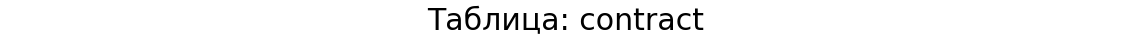


Общий вид
____________________________________________________________________________________________________


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6



Общая информация:
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

.describe()
____________________________________________________________________________________________________


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



.describe(текстовых значений датафрейма)
____________________________________________________________________________________________________


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,
freq,1,366,5174,3875,4171,2365,11


Информация о пропусках
____________________________________________________________________________________________________


,Количество пропусков,Процент пропусков %
customerID,0,0.0
BeginDate,0,0.0
EndDate,0,0.0
Type,0,0.0
PaperlessBilling,0,0.0
PaymentMethod,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0



____________________________________________________________________________________________________
Количество полных дубликатов: 0



In [6]:
overview(contract)

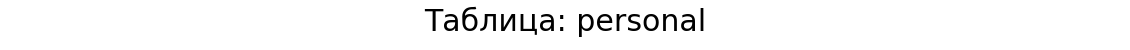


Общий вид
____________________________________________________________________________________________________


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No



Общая информация:
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

.describe()
____________________________________________________________________________________________________


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



.describe(текстовых значений датафрейма)
____________________________________________________________________________________________________


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,7590-VHVEG,Male,No,No
freq,1,3555,3641,4933


Информация о пропусках
____________________________________________________________________________________________________


,Количество пропусков,Процент пропусков %
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0



____________________________________________________________________________________________________
Количество полных дубликатов: 0



In [7]:
overview(personal)

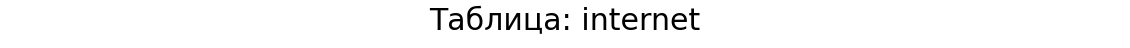


Общий вид
____________________________________________________________________________________________________


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No



Общая информация:
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

.describe()
____________________________________________________________________________________________________


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



.describe(текстовых значений датафрейма)
____________________________________________________________________________________________________


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Информация о пропусках
____________________________________________________________________________________________________


,Количество пропусков,Процент пропусков %
customerID,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0
DeviceProtection,0,0.0
TechSupport,0,0.0
StreamingTV,0,0.0
StreamingMovies,0,0.0



____________________________________________________________________________________________________
Количество полных дубликатов: 0



In [8]:
overview(internet)

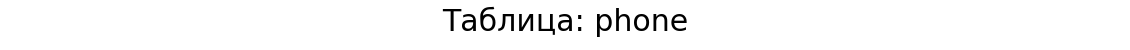


Общий вид
____________________________________________________________________________________________________


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes



Общая информация:
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

.describe()
____________________________________________________________________________________________________


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



.describe(текстовых значений датафрейма)
____________________________________________________________________________________________________


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


Информация о пропусках
____________________________________________________________________________________________________


,Количество пропусков,Процент пропусков %
customerID,0,0.0
MultipleLines,0,0.0



____________________________________________________________________________________________________
Количество полных дубликатов: 0



In [9]:
overview(phone)

<a id='conclusions_2_2'></a>
### Выводы [▴](#head)

По предварительному осмотру выяснили следующее:

В таблицах разное количество строк. Следовательно, чтобы получить максимально полные данные для модели, список пользователей будем брать из самой маленькой таблицы `internet` (5517 строк) и пришивать остальные таблицы к ней через `LEFT JOIN`

Пропусков и полных дубликатов в таблицах нет.

Целевой признак возьмем из столбца `EndDate` таблицы `contract`
- Значение `"No"` - класс `0` - клиент не ушел.
- Любая дата - класс `1` - клиент обиделся и ушел.

**Таблица `contract`**
- `customerID` - проблем нет, все значения уникальны, тип данных соответствует содержанию
- `BeginDate` - дата записана как текст требуется сменить тип → `datetime64`
- `EndDate` - целевой признак, значения `"No"` меняем на `0`, любую дату на `1`, приводим к типу → `int8`
- `Type` - категориальный признак. 3 уникальных значения, перевести в тип → `category`
- `PaperlessBilling` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `PaymentMethod` - категориальный признак. 4 уникальных значения, перевести в тип → `category`
- `MonthlyCharges` - числовой признак, тип данных соответствует содержанию
- `TotalCharges` - числовой признак записанный как текс, перевести в тип → `float64`

**Таблица `personal`**
- `customerID` - проблем нет, все значения уникальны, тип данных соответствует содержанию
- `gender` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `SeniorCitizen` - проблем нет
- `Partner` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `Dependents` - категориальный признак. 2 уникальных значения, перевести в тип → `category`

**Таблица `internet`**
- `customerID` - проблем нет, все значения уникальны, тип данных соответствует содержанию
- `InternetService` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `OnlineSecurity` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `OnlineBackup` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `DeviceProtection` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `TechSupport` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `StreamingTV` - категориальный признак. 2 уникальных значения, перевести в тип → `category`
- `StreamingMovies` - категориальный признак. 2 уникальных значения, перевести в тип → `category`


**Таблица `phone`**
- `customerID` - проблем нет, все значения уникальны, тип данных соответствует содержанию
- `MultipleLines` - категориальный признак. 2 уникальных значения, перевести в тип → `category`

<a id='part_2_3'></a>
## 2.3 Предобработка [▴](#head)

### Таблица `contract`

У нас есть дата, когда была сделана выгрузка, следовательно мы можем рассчитать как долго пользователь является/являлся клиентом оператора «Ниединогоразрыва.ком»

Для начала сделаем копию столбца `EndDate` и вместо значения `No` пропишем дату выгрузки, `2020-02-01`

In [13]:
contract['DurationDate'] = contract['EndDate'].copy()
contract.loc[contract['DurationDate'] == 'No', 'DurationDate'] = '2020-02-01'

Теперь создадим целевой признак для нашей модели. Для этого заменим в столбце `EndDate` любые даты на `1`, а все значения `No` на `0`

In [14]:
contract.loc[contract['EndDate'] != 'No', 'EndDate'] = 1
contract.loc[contract['EndDate'] == 'No', 'EndDate'] = 0

Время менять типы данных

In [15]:
contract['Type'] = contract['Type'].astype('category')
contract['EndDate'] = contract['EndDate'].astype('int8')
contract['BeginDate'] = contract['BeginDate'].astype('datetime64')
contract['DurationDate'] = contract['DurationDate'].astype('datetime64')
contract['PaymentMethod'] = contract['PaymentMethod'].astype('category')
contract['MonthlyCharges'] = contract['MonthlyCharges'].astype('float32')
contract['PaperlessBilling'] = contract['PaperlessBilling'].astype('category')

# при смене строковых значений на 'float' тспользуем параметр errors='coerce'
# чтобы все ошибки были прописаны в таблице как NaN
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['TotalCharges'] = contract['TotalCharges'].astype('float32')

Вычисляем сколько пользователь является или являлся клиентом нашего оператора. (в днях)

In [16]:
contract['TotalDuration'] = contract['DurationDate'] - contract['BeginDate']

# приводим значения к формату 'int'
contract['TotalDuration'] = contract['TotalDuration'].dt.days.astype('int16') 

Проверим, не возникли ли ошибки при замене строковых значений на числа.

In [17]:
contract[contract['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DurationDate,TotalDuration
488,4472-LVYGI,2020-02-01,0,Two year,Yes,Bank transfer (automatic),52.549999,NaN,2020-02-01,0
753,3115-CZMZD,2020-02-01,0,Two year,No,Mailed check,20.250000,NaN,2020-02-01,0
936,5709-LVOEQ,2020-02-01,0,Two year,No,Mailed check,80.849998,NaN,2020-02-01,0
1082,4367-NUYAO,2020-02-01,0,Two year,No,Mailed check,25.750000,NaN,2020-02-01,0
1340,1371-DWPAZ,2020-02-01,0,Two year,No,Credit card (automatic),56.049999,NaN,2020-02-01,0
3331,7644-OMVMY,2020-02-01,0,Two year,No,Mailed check,19.850000,NaN,2020-02-01,0
3826,3213-VVOLG,2020-02-01,0,Two year,No,Mailed check,25.350000,NaN,2020-02-01,0
4380,2520-SGTTA,2020-02-01,0,Two year,No,Mailed check,20.000000,NaN,2020-02-01,0
5218,2923-ARZLG,2020-02-01,0,One year,Yes,Mailed check,19.700001,NaN,2020-02-01,0
6670,4075-WKNIU,2020-02-01,0,Two year,No,Mailed check,73.349998,NaN,2020-02-01,0


Есть несколько значений. Это клиенты, которые только заключили контракты на обслуживание в день формирования выгрузки. По сути они заплатили только за первый месяц. Не смотря на то, что пропусков в столбце `TotalCharges` не так много, заполним их значениями из столбца `MonthlyCharges` вместо того, чтобы просто удалять.

In [18]:
na_index = contract[contract['TotalCharges'].isna()].index

In [19]:
contract.loc[na_index, ['TotalCharges']] = contract['MonthlyCharges']

Проверим, что все корректно отработало.

In [20]:
contract.loc[na_index]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DurationDate,TotalDuration
488,4472-LVYGI,2020-02-01,0,Two year,Yes,Bank transfer (automatic),52.549999,52.549999,2020-02-01,0
753,3115-CZMZD,2020-02-01,0,Two year,No,Mailed check,20.250000,20.250000,2020-02-01,0
936,5709-LVOEQ,2020-02-01,0,Two year,No,Mailed check,80.849998,80.849998,2020-02-01,0
1082,4367-NUYAO,2020-02-01,0,Two year,No,Mailed check,25.750000,25.750000,2020-02-01,0
1340,1371-DWPAZ,2020-02-01,0,Two year,No,Credit card (automatic),56.049999,56.049999,2020-02-01,0
3331,7644-OMVMY,2020-02-01,0,Two year,No,Mailed check,19.850000,19.850000,2020-02-01,0
3826,3213-VVOLG,2020-02-01,0,Two year,No,Mailed check,25.350000,25.350000,2020-02-01,0
4380,2520-SGTTA,2020-02-01,0,Two year,No,Mailed check,20.000000,20.000000,2020-02-01,0
5218,2923-ARZLG,2020-02-01,0,One year,Yes,Mailed check,19.700001,19.700001,2020-02-01,0
6670,4075-WKNIU,2020-02-01,0,Two year,No,Mailed check,73.349998,73.349998,2020-02-01,0


In [21]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   int8          
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float32       
 7   TotalCharges      7043 non-null   float32       
 8   DurationDate      7043 non-null   datetime64[ns]
 9   TotalDuration     7043 non-null   int16         
dtypes: category(3), datetime64[ns](2), float32(2), int16(1), int8(1), object(1)
memory usage: 261.9+ KB


Все ок

### Таблица `personal`

In [22]:
for i in ['gender',
          'Partner', 
          'Dependents']:
    personal[i] = personal[i].astype('category')

In [23]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     7043 non-null   object  
 1   gender         7043 non-null   category
 2   SeniorCitizen  7043 non-null   int64   
 3   Partner        7043 non-null   category
 4   Dependents     7043 non-null   category
dtypes: category(3), int64(1), object(1)
memory usage: 131.2+ KB


### Таблица `internet`

In [24]:
for i in ['InternetService', 
          'OnlineSecurity', 
          'OnlineBackup', 
          'DeviceProtection', 
          'TechSupport', 
          'StreamingTV', 
          'StreamingMovies']:
    internet[i] = internet[i].astype('category')

In [25]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5517 non-null   object  
 1   InternetService   5517 non-null   category
 2   OnlineSecurity    5517 non-null   category
 3   OnlineBackup      5517 non-null   category
 4   DeviceProtection  5517 non-null   category
 5   TechSupport       5517 non-null   category
 6   StreamingTV       5517 non-null   category
 7   StreamingMovies   5517 non-null   category
dtypes: category(7), object(1)
memory usage: 81.8+ KB


### Таблица `phone`

In [26]:
phone['MultipleLines'] = phone['MultipleLines'].astype('category')

In [27]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     6361 non-null   object  
 1   MultipleLines  6361 non-null   category
dtypes: category(1), object(1)
memory usage: 56.2+ KB


<a id='part_2_4'></a>
## 2.4 Исследовательсткий анализ данных [▴](#head)

### Таблица `contract`

In [28]:
contract.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DurationDate,TotalDuration
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.850000,29.850000,2020-02-01,31
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.950001,1889.500000,2020-02-01,1036
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.849998,108.150002,2019-12-01,61
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer (automatic),42.299999,1840.750000,2020-02-01,1371
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.699997,151.649994,2019-11-01,61


In [29]:
contract.describe(datetime_is_numeric=True)

,BeginDate,EndDate,MonthlyCharges,TotalCharges,DurationDate,TotalDuration
count,7043,7043.000000,7043.000000,7043.000000,7043,7043.000000
mean,2017-04-30 13:01:50.918642688,0.265370,64.761826,2279.797363,2020-01-11 12:56:19.696152320,985.996166
min,2013-10-01 00:00:00,0.000000,18.250000,18.799999,2019-10-01 00:00:00,0.000000
25%,2015-06-01 00:00:00,0.000000,35.500000,398.549988,2020-01-01 00:00:00,273.000000
50%,2017-09-01 00:00:00,0.000000,70.349998,1394.550049,2020-02-01 00:00:00,883.000000
75%,2019-04-01 00:00:00,1.000000,89.849998,3786.599976,2020-02-01 00:00:00,1676.000000
max,2020-02-01 00:00:00,1.000000,118.750000,8684.799805,2020-02-01 00:00:00,2191.000000
std,NaN,0.441561,30.089973,2266.731934,NaN,747.587844


**Посмотрим распределения данных**

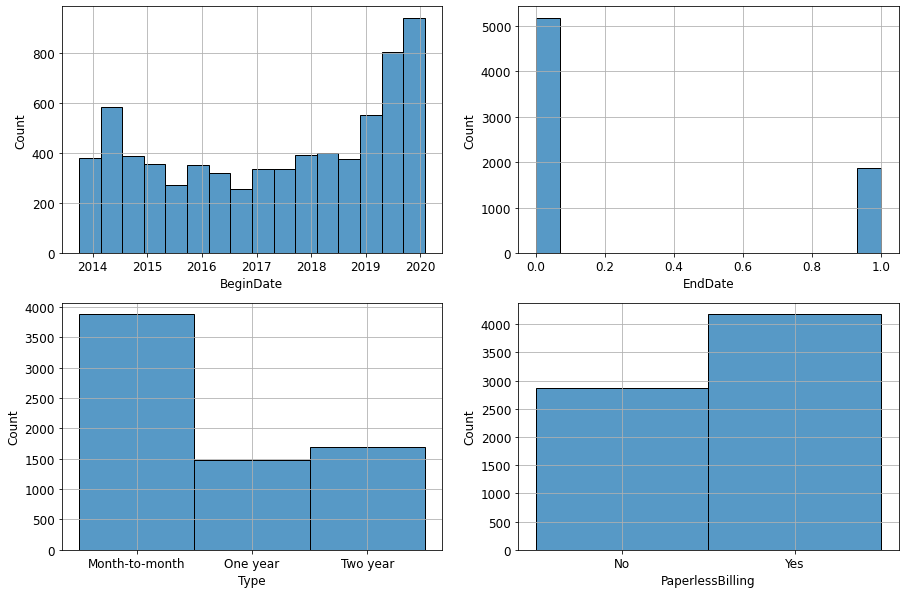

In [30]:
fig = plt.figure(figsize=(15,10))

list_to_plot = ['BeginDate', 'EndDate', 'Type', 'PaperlessBilling']

for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.histplot(contract[list_to_plot[i-1]])
    plt.grid()

plt.show()

- **`BeginDate`** - Первые пользователи датируются концом 2013 года. Количество новых пользователей, распределено равномерно до 2018 года. В 2019 году видно резкий прирост новых пользователей. В 2020 их количество удвоилось.
- **`EndDate`** - Количество ушедших пользователей примерно в 2,5 раза меньше чем действующих. Как следствие имеем дисбаланс классов. Учтем это при обучении моделей.
- **`Type`** - Подавляющее большинство пользователей предпочитает помесячный тип оплаты. Хотя если брать сумму пользователей на долгосрочных контрактах на 1 и 2 года, то получаются примерно сопоставимые цифры.
- **`PaperlessBilling`** - Большинство пользователей предпочитают электронный тип платежа.

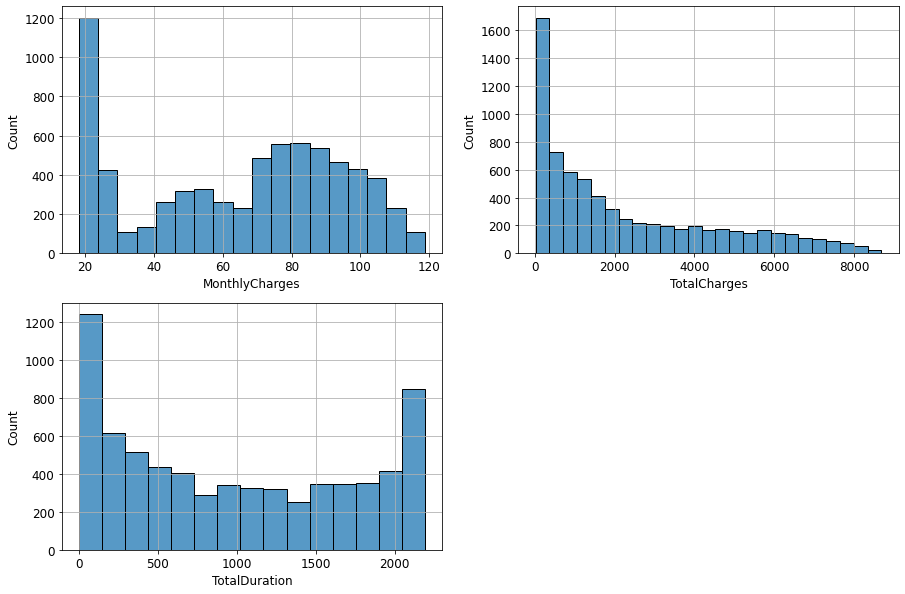

In [31]:
fig = plt.figure(figsize=(15,10))

list_to_plot = ['MonthlyCharges', 'TotalCharges', 'TotalDuration']

for i in range(1, 4):
    plt.subplot(2, 2, i)
    sns.histplot(contract[list_to_plot[i-1]])
    plt.grid()

plt.show()

- **`MonthlyCharges`** - У подавляющего большинства пользователей, ежемесячные траты на услуги составляют небольшую сумму врайоне `20` у.е. Так же видим два купола в районе `50` и `80` у.е. Скорей всего это стоимость базовых тарифов, которым пользуются клиенты не заказывая доп услуг.
- **`TotalCharges`** - Общие траты на услуги распределены нормально. По мере роста трат, падает количество клиентов, которые оставляли такие суммы
- **`TotalDuration`** - Для анализа продолжительности "жизни" клиента у данного оператора одной гистограммы недостаточно, так как данные перемешиваются, и непонятно, это просто новый пользователь с малым сроком "жизни", либо клиент быстро отвалился. Для того чтобы увидеть картину более полно, построим еще две гистограммы, сегментировав пользователей на тех, кто пользуется и на тех кто отвалился

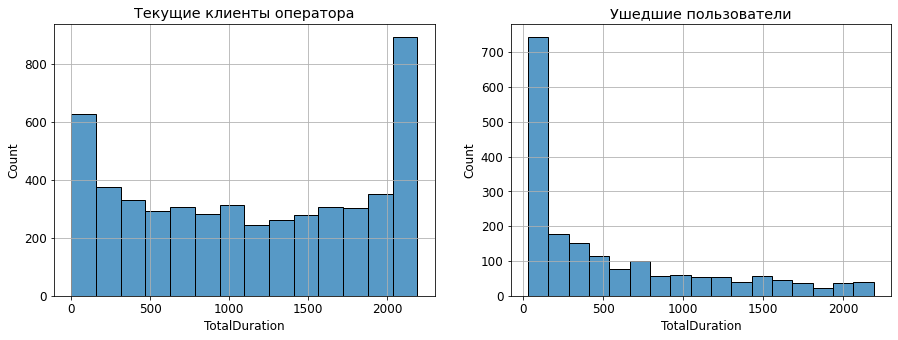

In [32]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(contract[contract['EndDate'] == 0]['TotalDuration'])
plt.title('Текущие клиенты оператора')
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(contract[contract['EndDate'] == 1]['TotalDuration'])
plt.title('Ушедшие пользователи')
plt.grid()

plt.show()

Рассмотрим гистограммы "жизни" пользователей относительно его статуса:
- **`Клиент активен`** - Видим большое количество "молодых" клиентов, которые только начали пользоваться услугами, это обусловлено большим приростом новых клиентов, которых мы видели на гистограмме распеределния по дате начала пользования услугами. Так же мы видим большое количество "старожил" этого оператора, которые пользуются услугами годами и видимо уходить никуда не собираются. Можно предположить, что оператор предоставляет качественные услуги по конкурентным ценам, раз удерживает клиентов такое продолжительное время.
- **`Клиент ушел`** - Подавляющая часть "отвалившихся" пользователе составляют "молодые" пользователи. Видимо это те кого что-то не устроило прям на старте, либо клиенты, которые наплывали "по акции", и сразу же уходили после того как получили выгоду. Дальше мы видим тенденцию, что чем дольше клиент пользуется услугами тем меньше вероятность, что он отвалится.

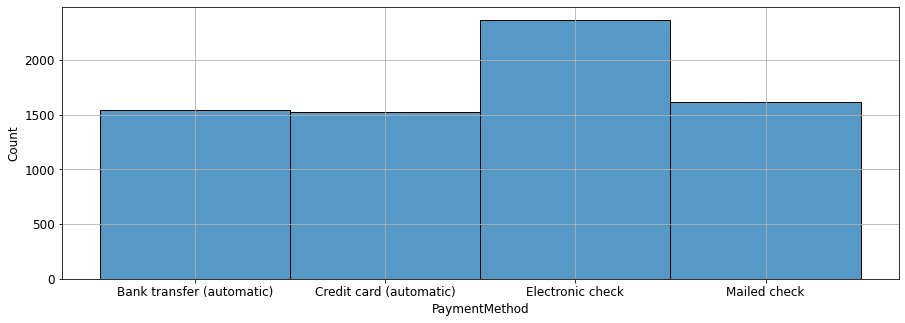

In [33]:
fig = plt.figure(figsize=(15,5))
sns.histplot(contract['PaymentMethod'])
plt.grid()
plt.show()

- **`PaymentMethod`** - По типу оплаты можно лишь сказать, что наибольшей популярностью пользуется электронный чек.

### Таблица `personal`

In [34]:
personal.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


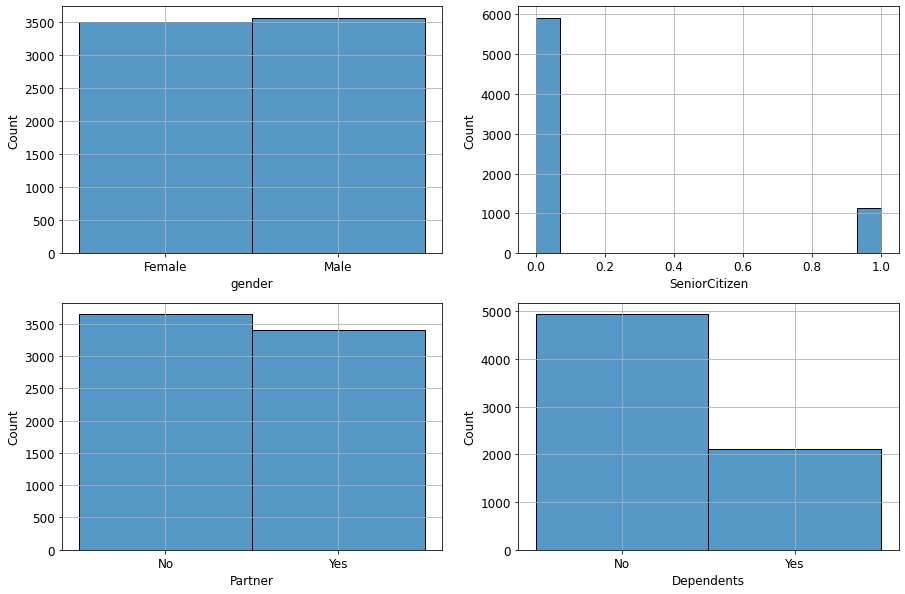

In [35]:
fig = plt.figure(figsize=(15,10))

list_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.histplot(personal[list_to_plot[i-1]])
    plt.grid()

plt.show()

- **`gender`** - Мальчиков и девочек у нас поровну.
- **`SeniorCitizen`** - Пенсионный статус имеет лишь около `15%` клиентов.
- **`Partner`** - Клиенты в браке и не находящиеся в браке распределены примерно поровну.
- **`Dependents`** - Клиентов без иждевенцев в `2.5` раза больше

### Таблица `internet`

In [36]:
internet.head(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


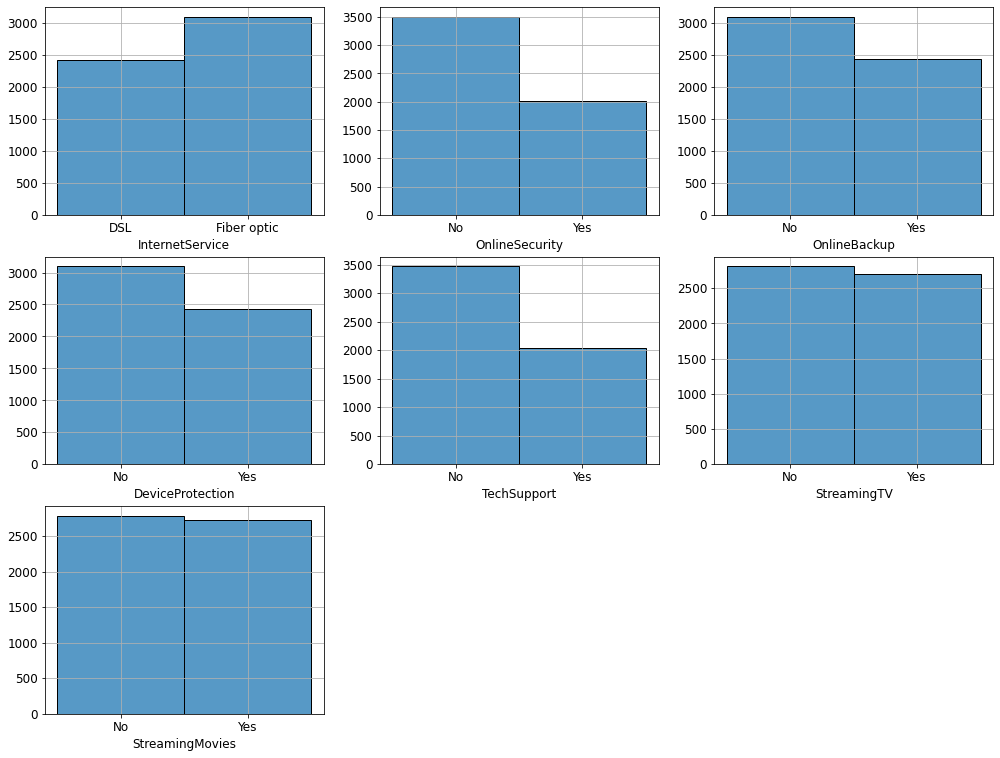

In [37]:
fig = plt.figure(figsize=(17,13))

list_to_plot = ['InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in range(1, 8):
    plt.subplot(3, 3, i)
    sns.histplot(internet[list_to_plot[i-1]])
    plt.grid()
    plt.ylabel('')

plt.show()

- **`InternetService`** - Преобладает современный тип подключения через оптику.
- **`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`** - По гистограммам видно, что пользователи скорее предпочитают не пользоваться дополнительными услугами связанными с безопасностью и поддержкой.
- **`StreamingTV`, `StreamingMovies`** - Количество подключенных пользователей к стримминговому сервису и каталогу кино распределены примерно поровну.

### Таблица `phone`

In [38]:
phone.head(5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


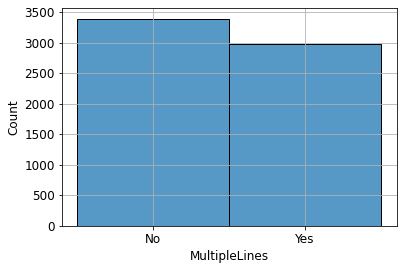

In [39]:
fig = plt.figure(figsize=(6,4))
sns.histplot(phone['MultipleLines'])
plt.grid()

- **`MultipleLines`** - Клиентов с наличием возможности ведения параллельных линий во время звонка примерно столько же сколько и без данной услуги.

<a id='part_3'></a>
# 3. Построение моделей [▴](#head)

<a id='part_3_1'></a>
## 3.1 Подготовка датасета [▴](#head)

Для начала получим один большой датасет со всеми признаками. Для этого смерджим все 4 таблицы.

Взглянем на их размер еще раз:

In [40]:
print('contract', contract.shape)
print('personal', personal.shape)
print('internet', internet.shape)
print('phone', phone.shape)

contract (7043, 10)
personal (7043, 5)
internet (5517, 8)
phone (6361, 2)


Видно что они различаются по количеству строк. Видимо у одной части пользователей не подключен интернет, а у второй части пользователей телефон. В связи с этим мерджить будем через `LEFT JOIN` начиная с полной таблицы, чтобы получить максимально полные данные.

In [41]:
df_all = contract.merge(
    personal, how='left', on='customerID').merge(
    internet, how='left', on='customerID').merge(
    phone, how='left', on='customerID')

Так как мы мерджили через `LEFT JOIN`, таблицы с меньшим количеством строк нагенерили нам пропусков, посмотрим на ситуацию в целом:

In [42]:
print(f'Информация о пропусках:\n')
df_i = df_all.isna().sum().index
df_na_sum = df_all.isna().sum().values
df_na_part = round(df_all.isna().sum() / df_all.shape[0] * 100, 1).values
print(pd.DataFrame({'Количество пропусков': df_na_sum,
                    'Процент пропусков %': df_na_part}, index=df_i)) 

Информация о пропусках:

                  Количество пропусков  Процент пропусков %
customerID                           0                  0.0
BeginDate                            0                  0.0
EndDate                              0                  0.0
Type                                 0                  0.0
PaperlessBilling                     0                  0.0
PaymentMethod                        0                  0.0
MonthlyCharges                       0                  0.0
TotalCharges                         0                  0.0
DurationDate                         0                  0.0
TotalDuration                        0                  0.0
gender                               0                  0.0
SeniorCitizen                        0                  0.0
Partner                              0                  0.0
Dependents                           0                  0.0
InternetService                   1526                 21.7
OnlineSecurity 

По этим данным можем сделать вывод, что у `9.7%` пользователей не подключен телефон, а у `21.7%` пользователей не подключен интернет у нашего оператора.

Заменим пропуски во всех столбцах от таблиц:
- `internet` - на `'No internet'`
- `phone` - на `'No phone'`

Так как тип данных в этих столбцах `'category'`, сначала добавим новую куатегорию, и уже потом проведем заменцу пропусков.

In [43]:
# для телефона
df_all['MultipleLines'] = df_all['MultipleLines'].cat.add_categories(['No phone'])
df_all['MultipleLines'] = df_all['MultipleLines'].fillna('No phone')


# для интернет сервисов
for i in ['InternetService',
          'OnlineSecurity',
          'OnlineBackup',
          'DeviceProtection',
          'TechSupport',
          'StreamingTV',
          'StreamingMovies']:
    df_all[i] = df_all[i].cat.add_categories(['No internet'])
    df_all[i] = df_all[i].fillna('No internet')

Проверяем, все ли корректно отработало:

In [44]:
print('Количество пропусков:')
df_all.isna().sum()

Количество пропусков:


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
DurationDate        0
TotalDuration       0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

Все отлично. Теперь оставим полный датасет без "мусорных" признаков, для этого удалим из него следующие столбцы:
- `customerID` - ID пользователя для всех уникальный, для модели это просто белый шум
- `BeginDate` - дата подключения никак не влияет на поведение пользователя. Как следствие это лишняя информация для модели
- `DurationDate` - дата отключения/выгрузки тоже никак нам не поможет

In [45]:
df = df_all.drop(['customerID', 'BeginDate', 'DurationDate'], axis=1)

<a id='part_3_2'></a>
## 3.2 Анализ признаков [▴](#head)

### Гистограммы распределения признаков относительно целевого признака

Целевой признак **`EndDate`**
- `0` - пользователь является клиентом оператора
- `1` - клиент ушел

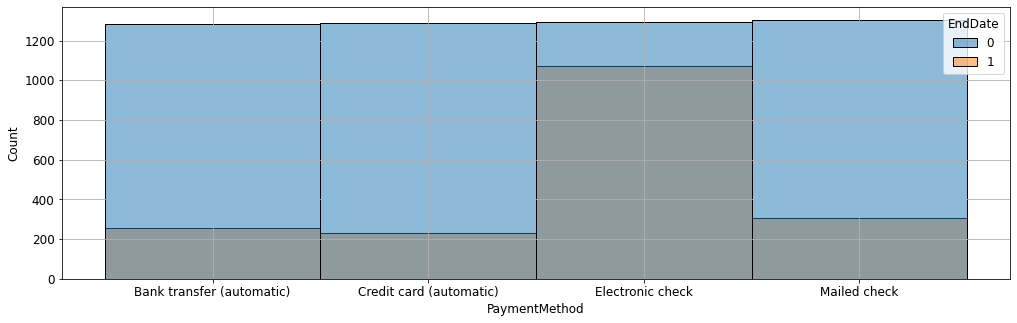

In [46]:
fig = plt.figure(figsize=(17,5))
sns.histplot(data=df, x='PaymentMethod', hue='EndDate')
plt.grid()
plt.show()

Подавляющая масса клиентов, которые ушли предпочитали электронный чек. Что объяснимо тем, что они не расчитывали на долгосрочные договора с оператором.

In [47]:
num_col = ['MonthlyCharges', 
           'TotalCharges', 
           'TotalDuration']

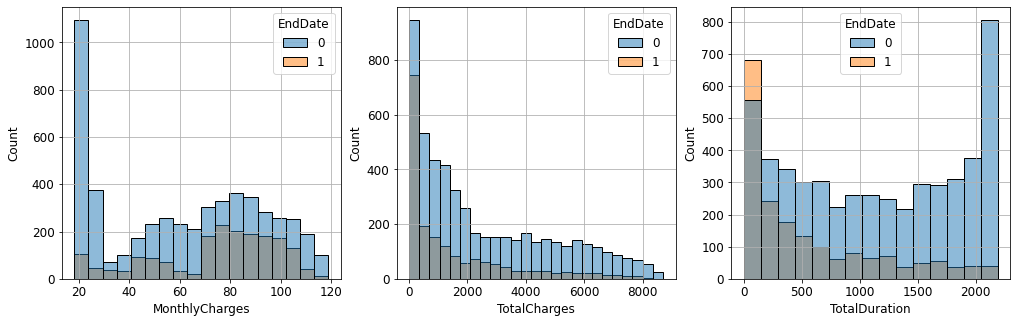

In [48]:
fig = plt.figure(figsize=(17,5))

for i in range(1, len(num_col) + 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=num_col[i - 1], hue='EndDate')
    plt.grid()
    
plt.show()

Видно, что основная масса ушедших клиентов имела большие ежемесячные платежи, но если смотреть на общие платежи, то ситуация обратная, чем меньше общее количество потраченых средсвт, тем больше соотношение ушедших пользователей к текущим.

Такая же ситуация с общим сроком пользования услугами. Большинство отвалившихся, те - кто пользовался услугами буквально один месяц. Дальше процент равномерно падает до определенного уровня.

In [49]:
cat_col = ['Type', 
           'PaperlessBilling', 
           'gender', 
           'Partner',
           'Dependents',
           'SeniorCitizen']

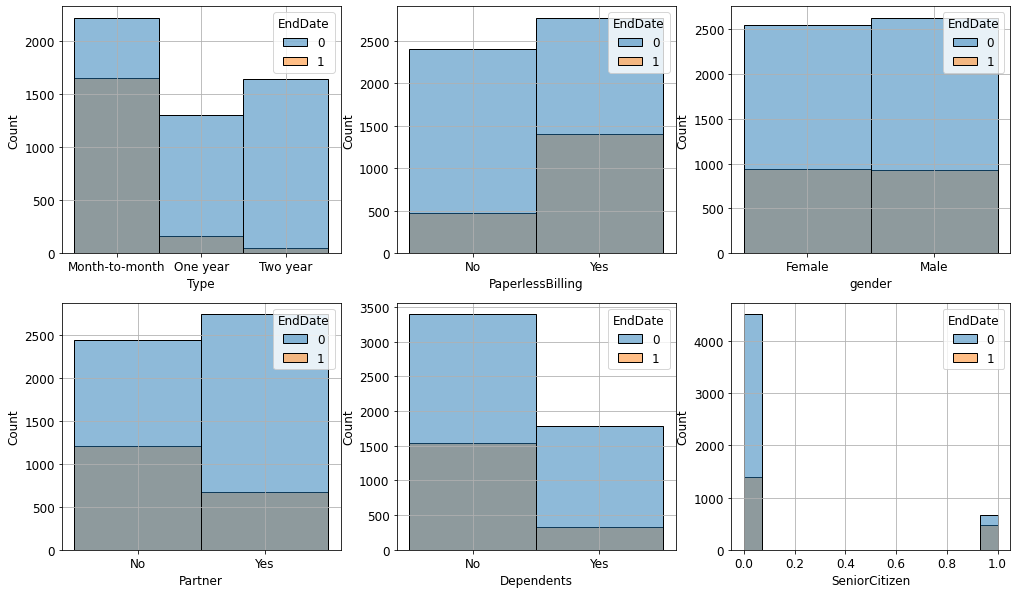

In [50]:
fig = plt.figure(figsize=(17,10))

for i in range(1, len(cat_col) + 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=cat_col[i - 1], hue='EndDate')
    plt.grid()
    
plt.show()

Основная масса ушедших клиентов не заключала долгосрочные договора с оператором, предпочитала электронный счет.

Так же можно отметить что количество ушедших пенсионеров почти равно количеству текущих клиентов-пенсионеров.

In [51]:
data_col = ['InternetService', 
            'MultipleLines']

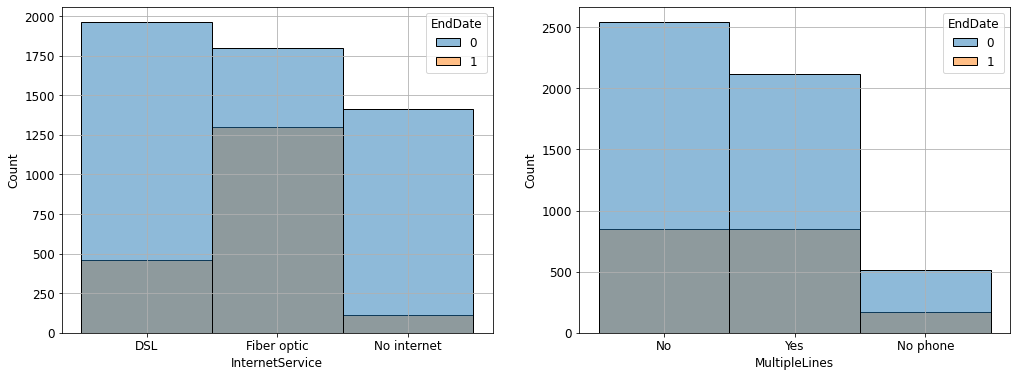

In [52]:
fig = plt.figure(figsize=(17,6))

for i in range(1, len(data_col) + 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=df, x=data_col[i - 1], hue='EndDate')
    plt.grid()
    
plt.show()

Подавляющая часть ушедших клиентов пользовалась оптоволоконным интернетом.

In [53]:
int_s_col = ['OnlineSecurity',
             'OnlineBackup',
             'DeviceProtection', 
             'TechSupport', 
             'StreamingTV', 
             'StreamingMovies']

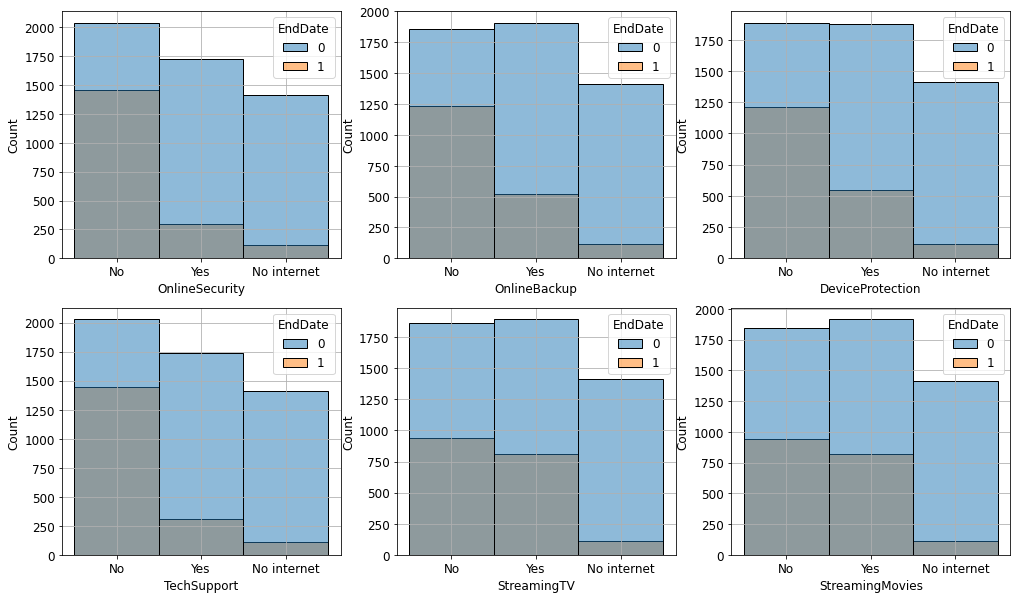

In [54]:
fig = plt.figure(figsize=(17,10))

for i in range(1, len(int_s_col) + 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=int_s_col[i - 1], hue='EndDate')
    plt.grid()
    
plt.show()

Основную массу ушедших клиентов не интересовали услуги безопасности.

<a id='part_3_3'></a>
## 3.3 Подготовка выборок [▴](#head)

Разделим наши выборки на `тренировочную` и `тестовую` в пропорции `3 к 1`

In [55]:
X = df.drop(['EndDate'], axis=1)
y = df['EndDate']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=rs_all, 
                                                    test_size=0.25,
                                                    stratify=y)

Проверим как поделилось. 

Заодно посмотрим как распределены классы в наших выборках.

Размеры выборок:

(7043, 19) - df
(7043, 18) - X
(7043,) - y


Доля: 0.75 | X: (5282, 18) - Тренировочные
Доля: 0.75 | y: (5282,) - Тренировочные

Доля: 0.25 | X: (1761, 18) - Тестовые
Доля: 0.25 | y: (1761,) - Тестовые


Распределение классов:


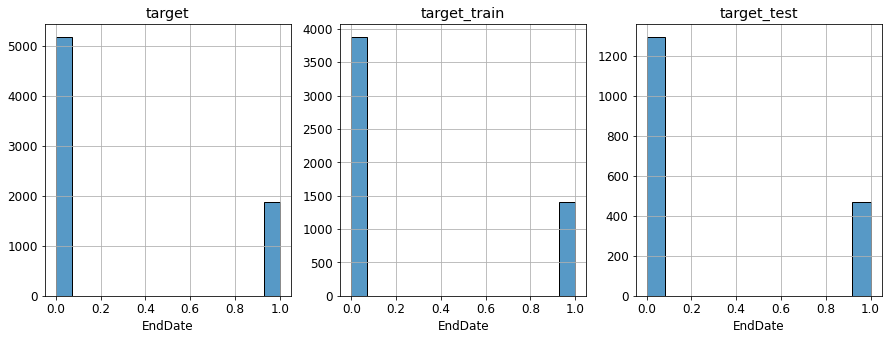

In [56]:
def part_of_df(X, y, title):
    print(f'\nДоля: {len(X) / len(df):.2f} | X: {X.shape} - {title}')
    print(f'Доля: {len(y) / len(df):.2f} | y: {y.shape} - {title}')

print('Размеры выборок:\n')

print(f'{df.shape} - df')
print(f'{X.shape} - X')
print(f'{y.shape} - y\n')

part_of_df(X_train, y_train, 'Тренировочные')
part_of_df(X_test, y_test, 'Тестовые')


print('\n')
print('Распределение классов:')

plt.figure(figsize=(15, 5))
for i in range(1,4):
    plt.subplot(1, 3, i)
    sns.histplot(data=[y, y_train, y_test][i-1])
    plt.title(['target', 'target_train', 'target_test'][i-1])
    plt.grid()
    plt.ylabel('')
    
plt.show()

Так как наша целевая метрица `ROC AUC`, балансировать классы не требуется.

<a id='part_3_4'></a>
## 3.4 Кодирование и масштабирование признаков [▴](#head)

### Обучение OneHotEncoder

In [57]:
encoder = OneHotEncoder(drop='first') # чтобы модель не переобучилась избавляемся от первого признака в группе

cat_columns = X_train.select_dtypes(include=['object', 'category']).columns # получаем список текстовых заголовков
encoder.fit(X_train[cat_columns])

OneHotEncoder(drop='first')

### Обучение StandardScaler

In [58]:
scaler = StandardScaler()

numeric_columns = X_train.drop(columns=cat_columns).reset_index(drop=True) # оставим в переменной числовые столбцы
numeric_labels = numeric_columns.columns # имена столбцов сохраним в отдельной переменной
scaler.fit(numeric_columns) 

StandardScaler()

### Кодирование X_train

**Применяем StandardScaler**

In [59]:
numeric_columns = X_train.drop(columns=cat_columns).reset_index(drop=True) # оставляем числовые столбцы
                                                                # и сбрасываем индекс для корректного конкатенирования
numeric_columns = scaler.transform(numeric_columns) # масштабиркемм признаки
numeric_columns = pd.DataFrame(numeric_columns, columns=numeric_labels) # восстанавливаем датафрейм с цифровыми признаками
                                                            # только теперь они отмасштабированы

**Применяем OneHotEncoder**

In [60]:
encoded_array = encoder.transform(X_train[cat_columns]).toarray() # массив кодированных признаков

# конструкция через try... except... чтобы код не падал на практикуме
try:
    encoded_labels = encoder.get_feature_names_out() # имена столбцов
except:
    encoded_labels = encoder.get_feature_names() # имена столбцов

encoded_df = pd.DataFrame(encoded_array, columns=encoded_labels) # собранный датафрейм кодированных признаков

**Сшиваем выборку X_train**

In [61]:
X_train = pd.concat([numeric_columns, encoded_df], axis=1).copy() # перезаписываем нашу тренировочную выборку

del numeric_columns # на всякий случай удаляем временную переменную, так как будем ее переиспользовать
del encoded_df

X_train.head(3) # проверим что все ОК

,MonthlyCharges,TotalCharges,TotalDuration,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_No internet,DeviceProtection_Yes,TechSupport_No internet,TechSupport_Yes,StreamingTV_No internet,StreamingTV_Yes,StreamingMovies_No internet,StreamingMovies_Yes,MultipleLines_No phone,MultipleLines_Yes
0,1.440429,2.449976,1.617166,-0.438549,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.643008,-0.988400,-1.277658,-0.438549,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.504717,-0.375968,1.617166,-0.438549,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Кодирование X_test

**Применяем StandardScaler**

In [62]:
numeric_columns = X_test.drop(columns=cat_columns).reset_index(drop=True) # оставляем числовые столбцы
                                                                # и сбрасываем индекс для корректного конкатенирования
numeric_columns = scaler.transform(numeric_columns) # масштабиркемм признаки
numeric_columns = pd.DataFrame(numeric_columns, columns=numeric_labels) # восстанавливаем датафрейм с цифровыми признаками
                                                            # только теперь они отмасштабированы

**Применяем OneHotEncoder**

In [63]:
encoded_array = encoder.transform(X_test[cat_columns]).toarray()

try:
    encoded_labels = encoder.get_feature_names_out() # имена столбцов
except:
    encoded_labels = encoder.get_feature_names() # имена столбцов

encoded_df = pd.DataFrame(encoded_array, columns=encoded_labels)

**Сшиваем выборку X_test**

In [64]:
X_test = pd.concat([numeric_columns, encoded_df], axis=1).copy() # перезаписываем нашу тренировочную выборку

del numeric_columns 
del encoded_df

X_test.head(3) 

,MonthlyCharges,TotalCharges,TotalDuration,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_No internet,DeviceProtection_Yes,TechSupport_No internet,TechSupport_Yes,StreamingTV_No internet,StreamingTV_Yes,StreamingMovies_No internet,StreamingMovies_Yes,MultipleLines_No phone,MultipleLines_Yes
0,1.020408,-0.322352,-0.665472,-0.438549,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.031360,-0.517188,0.029768,-0.438549,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.297039,-0.884674,-1.154417,-0.438549,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='part_3_5'></a>
## 3.5 Функции для обучения [▴](#head)

Для оптимизации количества кода напишем функцию. 

Но для начала создадим пустые списки, в которые будем добавлять результаты работы функций.

In [65]:
best_models = []
models_names = []
train_results = []
best_params_list = []
learn_times = []

Теперь функция `auto_grid(search_model, params)`

**Принимает на вход:**
- модель
- гиперпараметры для модели, которые необходимо перебрать

**Тело функции:**
- запускает `GridSearchCV` с выбранной моделью и гиперпараметрами
- добавляет в списки:
    - `best_models` - модель, с гиперпараметрами на которые получился лучший результат
    - `models_names` - название испытуемой модели
    - `train_results` - лучший результат, который получился на тренировочной выборке
    - `best_params_list` - словарь с гиперпараметрами, которые дали лучший результат
    - `learn_times` - время в секундах, за которое отработала функция

In [66]:
def auto_grid(search_model, params):
    
    start = time.time()
    
    # для того чтобы выборки для кросс-валидации были стратифицированными используем функцию StratifiedKFold
    skf = StratifiedKFold(n_splits=3)
    
    grid_search = GridSearchCV(estimator=search_model,
                               param_grid=params,
                               cv=skf,
                               scoring='roc_auc',
                               n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    stop = time.time()
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = round(grid_search.best_score_, 3)
    learn_time = round(stop - start, 3)
    
# собираем данные

    if 'CatBoostClassifier' in str(search_model): # костыль для катбуста из-за нестандартного написания
        models_names.append('CatBoostClassifier')
    else:
        models_names.append(str(search_model).split('(')[0]) # оставляем только название модели и делаем как текст
    
    best_models.append(best_model)
    best_params_list.append(best_params)
    train_results.append(best_score)
    learn_times.append(learn_time)    

# выводим результат
    
    print(f'Лучший roc_auc_train: {best_score}')
    print(f'Параметры лучшей модели: {best_params}')
    print(f'Время выполнения ячейки: {learn_time:.0f} сек.')
    

<a id='part_3_6'></a>
## 3.6 Обучение моделей [▴](#head)

### LogisticRegression

In [67]:
model = LogisticRegression(solver='liblinear', random_state=rs_all)
params = {'class_weight': ['balanced', None]}

auto_grid(model, params)

Лучший roc_auc_train: 0.833
Параметры лучшей модели: {'class_weight': None}
Время выполнения ячейки: 4 сек.


### DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier(random_state=rs_all)
params = {'max_depth': [5, 10, 15],
          'min_samples_leaf': [9, 12, 15],
          'min_samples_split': [2, 3, 5]}

auto_grid(model, params)

Лучший roc_auc_train: 0.832
Параметры лучшей модели: {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}
Время выполнения ячейки: 1 сек.


### RandomForestClassifier

In [69]:
model = RandomForestClassifier(random_state=rs_all)
params = {'n_estimators': [200, 100],
          'min_samples_leaf': [9, 5],
          'min_samples_split': [2, 3],
          'max_depth': [4, 6]}

auto_grid(model, params)

Лучший roc_auc_train: 0.847
Параметры лучшей модели: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Время выполнения ячейки: 4 сек.


### LGBMClassifier

In [70]:
model = lgb.LGBMClassifier(random_state=rs_all)
params = {'max_depth': [2, 4],
          'n_estimators': [500, 750, 1000],
          'learning_rate': [0.1, 0.05]}

auto_grid(model, params)

Лучший roc_auc_train: 0.895
Параметры лучшей модели: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}
Время выполнения ячейки: 4 сек.


### XGBClassifier

In [71]:
model = xgb.XGBClassifier(random_state=rs_all)
params = {'max_depth': [6, 4],
          'n_estimators': [500, 1000, 2000],
          'learning_rate': [0.1, 0.05]}

auto_grid(model, params)

Лучший roc_auc_train: 0.888
Параметры лучшей модели: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 2000}
Время выполнения ячейки: 38 сек.


### Catboost

In [72]:
model = CatBoostClassifier(random_state=rs_all, verbose=False)
params = {'iterations': [500, 1000, 2000],
          'depth': [5, 3],
          'learning_rate': [0.1, 0.05]}

auto_grid(model, params)

Лучший roc_auc_train: 0.908
Параметры лучшей модели: {'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}
Время выполнения ячейки: 36 сек.


### DummyClassifier

In [73]:
model = DummyClassifier(random_state=rs_all)
params = {'strategy': ['prior', 'stratified', 'uniform']}

auto_grid(model, params)

Лучший roc_auc_train: 0.5
Параметры лучшей модели: {'strategy': 'prior'}
Время выполнения ячейки: 0 сек.


<a id='part_3_7'></a>
## 3.7 Результаты обучения [▴](#head)

Соберем все списки в один датафрейм.

In [74]:
results_df = pd.DataFrame({'auc_roc_train': train_results, 
                           'grid_search_time': learn_times,
                           'model_params': best_params_list,
                           'best_model': best_models}, 
                          index=models_names)

# отсортируем значения по лучшему показателю на тренировочной выборке 
# теперь лучшая модель на первой строчке
results_df = results_df.sort_values('auc_roc_train', ascending=False)

display(results_df)

,auc_roc_train,grid_search_time,model_params,best_model
CatBoostClassifier,0.908,35.971,"{'depth': 3, 'iterations': 2000, 'learning_rat...",<catboost.core.CatBoostClassifier object at 0x...
LGBMClassifier,0.895,4.112,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...","LGBMClassifier(max_depth=2, n_estimators=1000,..."
XGBClassifier,0.888,37.837,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...","XGBClassifier(base_score=0.5, booster='gbtree'..."
RandomForestClassifier,0.847,3.999,"{'max_depth': 6, 'min_samples_leaf': 5, 'min_s...","(DecisionTreeClassifier(max_depth=6, max_featu..."
LogisticRegression,0.833,3.661,{'class_weight': None},"LogisticRegression(random_state=281122, solver..."
DecisionTreeClassifier,0.832,1.438,"{'max_depth': 5, 'min_samples_leaf': 9, 'min_s...","DecisionTreeClassifier(max_depth=5, min_sample..."
DummyClassifier,0.500,0.140,{'strategy': 'prior'},DummyClassifier(random_state=281122)


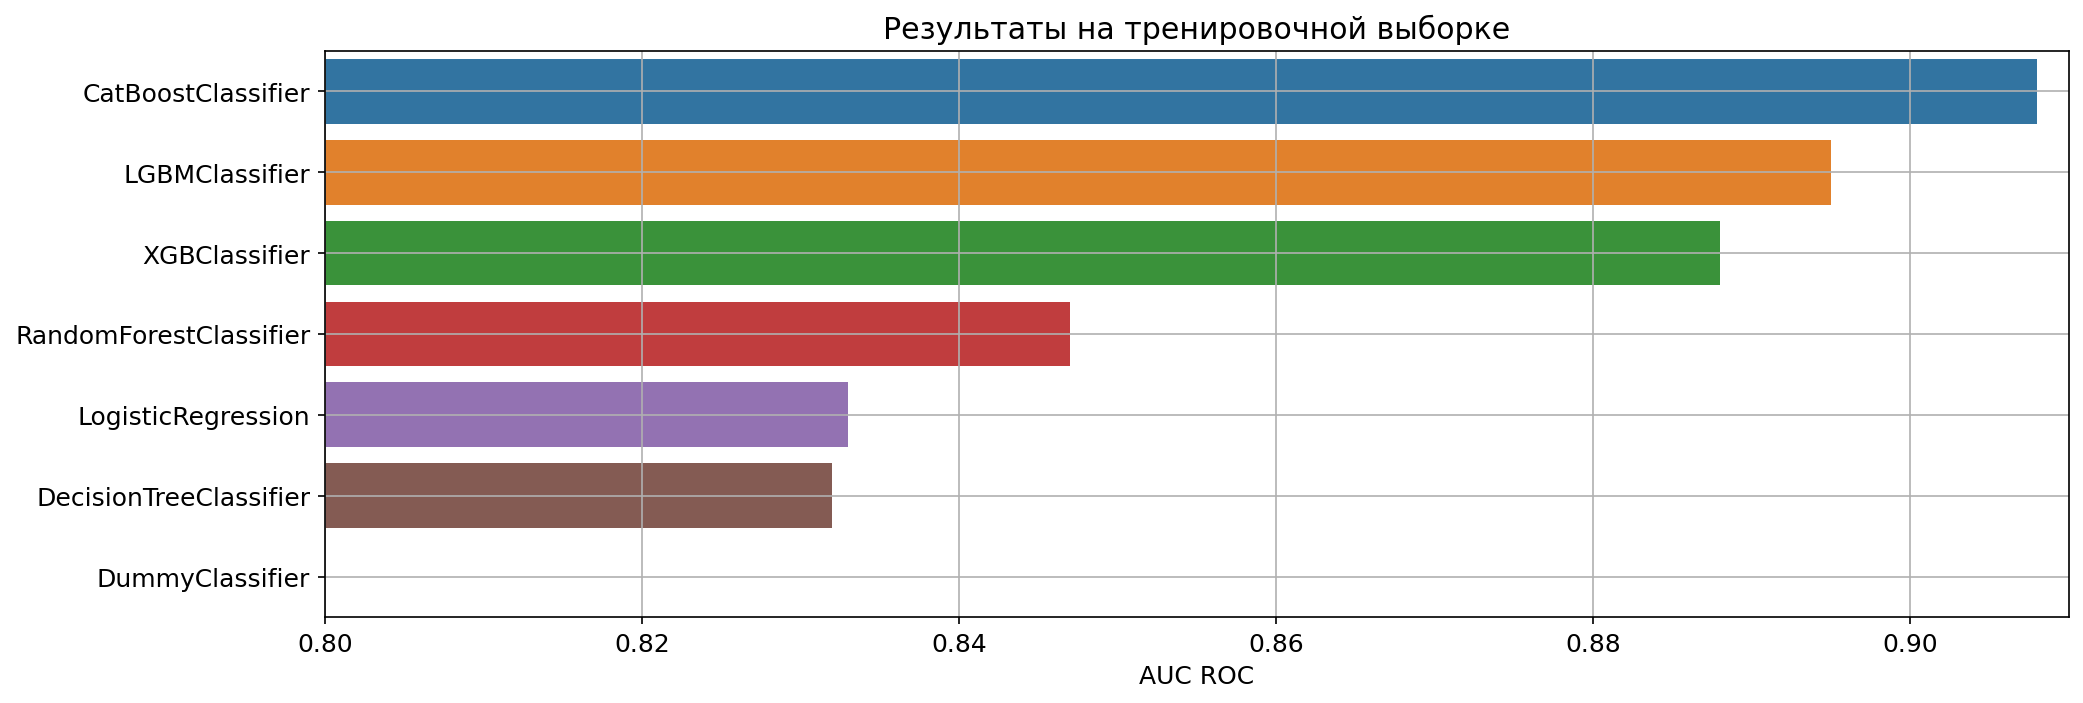

In [75]:
plt.figure(figsize=(15,5), dpi=150)

sns.barplot(y=results_df.index,
            x=results_df['auc_roc_train'],
            orient='h')

plt.title('Результаты на тренировочной выборке')
plt.xlabel('AUC ROC')
plt.xlim(0.8, 0.91)
plt.grid()
plt.show()

Лучшей моделью на тренировочной выборке оказалась `CatBoostClassifier` осталось протестировать ее.

<a id='part_3_8'></a>
## 3.8 Тестирование лучшей модели [▴](#head)

Посмотрим на лучшую модель:

In [76]:
print('Лучшая модель:')
display(results_df.iloc[0:1])

Лучшая модель:


,auc_roc_train,grid_search_time,model_params,best_model
CatBoostClassifier,0.908,35.971,"{'depth': 3, 'iterations': 2000, 'learning_rat...",<catboost.core.CatBoostClassifier object at 0x...


Заберем модель с установленными гиперпараметрами из первой ячейки столбца `best_model` обучим ее на тренировочной выборке, проверим результаты на тестовой.

In [77]:
model = results_df.iloc[0]['best_model']
model.fit(X_train, y_train)

predicted_test = model.predict(X_test)
probabilities_test = model.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]

### Результаты тестирования

In [78]:
accuracy = accuracy_score(y_test, predicted_test)
auc_roc = roc_auc_score(y_test, probabilities_one_test)

print(f'Accuracy: {accuracy:.3f}')
print(f'AUC ROC: {auc_roc:.3f}')

Accuracy: 0.888
AUC ROC: 0.942


`AUC ROC = 0.942` такой результат нас полностью устраивает.

### Посмотрим на графики и матрицу ошибок.

In [79]:
def roc(target, predicted, probabilities_one):
    
    fpr, tpr, thresholds = roc_curve(target, probabilities_one)

    plt.figure(figsize=(7, 6))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.grid()
    plt.show()

### ROC - кривая

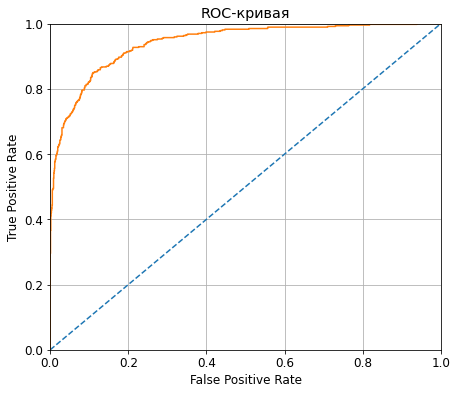

In [80]:
roc(y_test, predicted_test, probabilities_one_test)

### Матрица ошибок

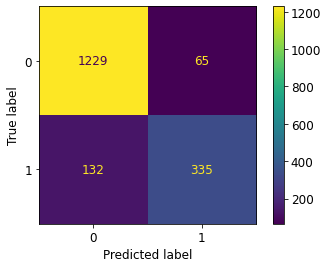

In [81]:
try:
    ConfusionMatrixDisplay(confusion_matrix).from_estimator(model, X_test, y_test)
except:
    plot_confusion_matrix(model, X_test, y_test)

plt.show()

- Истинно отрицательных ответов `1229` шт.
- Истинно положительных ответов `335` шт.
- Ложно отрицательных ответов `132` шт.
- Ложно положительных ответов `65` шт.

### PrecisionRecall - кривая

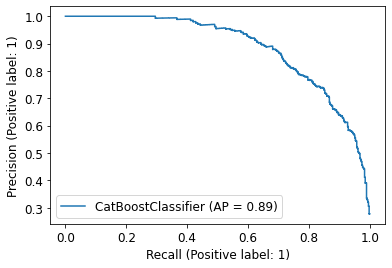

In [82]:
try:
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
except:
    plot_precision_recall_curve(model, X_test, y_test)

plt.show()

### Важность признаков

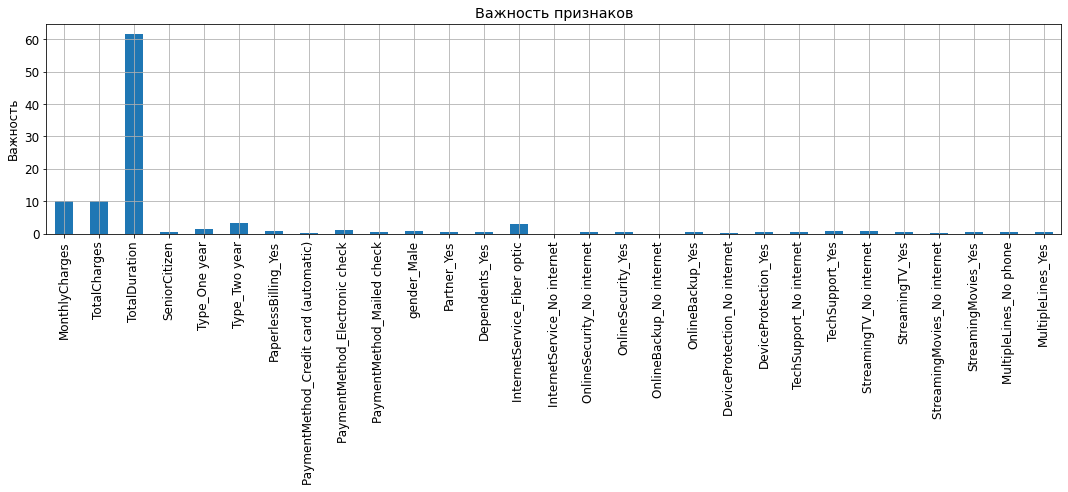

In [83]:
importance = pd.Series(model.feature_importances_, X_test.columns)

fig, ax = plt.subplots(figsize=(15,7))
importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()
plt.grid()
plt.show()

<a id='part_3_9'></a>
## 3.9 Выводы [▴](#head)

- Входные данные оказались чистыми, предобработка потребовалась только в части приведения данных к нужному типу.
- Целевой признак для решении задачи был сформирован нами самостоятельно, а так же добавлен дополнительный признак о сроке "жизни" клиента у оператора, на основе дат старта договора и его окончания.
- По большей части уходят от оператора "молодые" клиенты, это либо участники акций, либо просто клиенты с собыми требованиями.
- И наоборот, чем клиент дольше у оператора, тем меньше вероятность, что он откажется от услуг. Это говорит нам о том, что оператор предоставляет услуги достаточно стабильно и держит конкурентные цены, раз клиенты у него задерживаются на продолжительное время.
- Мы выполнили поставленную клиентом задачу и добились метрики `AUC ROC = 0.942`, что оказалось даже выше чем в максимальном требовании клиента в `0.88`
- Лучше всего для нашей задачи подошла модель `CatBoostClassifier` со следующими гиперпараметрами:
    - `'depth': 3 `
    - `'iterations': 2000`
    - `'learning_rate': 0.1`
- Для кодирования категориальныхз признаков мы использовали метод `OneHotEncoder`
- Так же дополнительно были отмасштабированы числовые признаки методом `StandardScaler`
- Признаки, которые выше всего оказывают влияние на нашу модель:
    - `TotalDuration`
    - `MonthlyCharges`
    - `TotalCharges`
- Признаки, которые немного оказывают влияния на нашу модель:
    - `Type` (тип контракта)
    - `InternetService`

<a id='part_4'></a>
# 4. Отчет [▴](#head)

<a id='part_4_1'></a>
## 4.1 Введение [▴](#head)

`Дата: 10 декабря 2022`

Нам поступила задача от оператора связи «Ниединогоразрыва.ком». Было необходимо разработать модель машинного обучения для прогнозирования оттока клиентов. Параллельно с этим требовалось провести ислледовательский анализ данных о клиентах.

Входные данные представляли из себя 4 таблицы:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Где информация о договорах актуальна на `1 февраля 2020`


<a id='part_4_2'></a>
## 4.2 План [▴](#head)

В начале нами был подготовлен план действий:

- **Вопросы заказчику.**
    - в исходных материалах недостаточно информации для качественного решения задачи. Необходимо задать дополнительные вопросы заказчику.
- **Анализ данных**
    - импорт необходимых библиотек и таблиц
    - предварительное знакомство с данными, анализ пропусков, дублей и т.п.
    - предобработка (заполнение пропусков, приведение данных к нужным типам)
    - исследовательский анализ данных
- **Объединение датасета**
- **Создание обучающей и тестовой выборок**
    - создание выборок
    - подготовка категориальных признаков
    - балансировка классов (если понадобится)
- **Создание функций для оптимизации обучения моделей. Функции решат следующие вопросы:**
    - оптимизируют количество кода
    - посчитают время обучения моделей
    - соберут результаты тестирования моделей
- **Запуск обучения**
    - сравнение результатов
    - выбор модели с лучшими показателями по качеству/скорости работы
- **Тестирование лучшей модели**
- **Финальный отчет**


Все пункты плана были выполнены, за исключением пары моментов:
- Заполнение пропусков понадобилось лишь на этапе объединения датасета. Изначальные таблицы пропусков не содержали. Подробнее этот момент будет описан ниже по тексту.
- В плане не был учтен момент масштабирования признаков, который по итогу понадобился.

<a id='part_4_3'></a>
## 4.3 Подготовка [▴](#head)

### Для выполнения задачи нам потребовались следующие библиотеки:

```python
import time
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
```

### При первоначальном знакомстве с данными, нами было отмечено:
- все данные не содержали пропусков, аномалий и прочих изъянов
- некоторые данные не соответствовали своему типу
- таблицы `internet` `(5517)` и `phone` `(6361)` имели меньшее количество строк чем таблицы `contract` `(7043)` и `personal` `(7043)`
- в таблицах не было целевого признака в явном виде, нам потребовалось сформировать его самим
- в таблицах отсутствовал такой признак как срок "жизни" клиента у оператора, было необходимо вычислить это самостоятельно на основе предоставленных данных

### Далее была проведена предобработка:
- данные были приведены к необходимому типу
- на этапе конвертации признака `TotalCharges` содержащего числовые значения в текстовом видео из `object` во `float` выяснилось, что 11 строк просто содержали пробелы (из за этого это не отобразилось как пропуски на первом ознакомлении). При детальном рассмотрении это оказались данные новых клиентов, которые только подключились и заплатили за 1 месяц `MonthlyCharges`по этому в признаке `TotalCharges` их данные оказались пустыми. Заполнили эти пропуски данными из столбца `MonthlyCharges`
- был сформирован целевой признак
- был сформирован дополнительный признак, со сроком "жизни" клиента у оператора, в днях

### В исследовательском анализе данных было выяснено следующее:
- первые пользователи оператора датируются 2013 годом и многие из них по сей день пользуются услугами нашего оператора. Это говорит нам о том, что оператр предоставляет качественные и стабильныке услуги, скорей всего по конкурентным ценам. 
- в 2019 году начался активный рост клиентов. Видимо оператор решил привлекать новую аудиторию.
- в 2020 году клоличество клиентов удвоилось по сравнению с 2018
- большинство клиентов предпочитает электронный метод оплаты
- у подавляющего большинства пользователей, ежемесячные траты не превышают 20 у.е. видимо они пользуются самым базовым набором услуг
- пенсионеров среди клиентов подавляюще мало. Основная аудитория оператора люди не пенсионного возраста
- так же, основную часть аудитории составляют люди без иждевенцев
- распределение по полу пользователей показывает практически одинаковое количество мужчин и женщин
- так же практически одинаковое количество пользователей разделелись в отношении зарегистрированнгого брака и без
- большинство клиентов предпочитают не подключать себе услуги связанные с безопасностью (`тех поддержка`, `защита устройств`, `онлайн резервная копия`, `онлайн безопасность`)
- у большинства клиентов подключена современная оптоволоконная линия связи

### Этап объединения датасета
- так как количество строк в таблицах `internet` и `phone` было меньше чем в `contract` и `personal` у нас образовались пропуски при соединеннии таблиц
- меньше количество строк обусловлено тем, что у одной части пользователей не был подключен и нтернет, а у другой части пользователей не был подключен телефон
- пропуски были заполнены на значения `No internet` и `No phone` там, где это  требовалось.

### Анализ признаков, в зависимости от целевого
- основная часть ушедших пользователей выбрала метод оплаты `Электронный чек`
- большая часть "отвалившихся" клиентов - это молодые клиенты, видимо их завлекли рекламными предложениями и акциями на этапе наращивания аудитории. 
- так же у большей части пользователей был большой ежемесячный платеж, что возможно, нам говорит о следующем:
	- этим клиентам либо навязали кучу ненужных услуг
	- либо наоборот это требовательные клиенты, которых что то не устроило в расширенных услугах
- так же можно отметить, что количество ушедших пенсионеров почти равно количеству текущих клиентов-пенсионеров. Что говорит о том, что текучка среди возрастных клиентов большая
- большинство клиентов которые "отвалились" предпочитали оптическое соединение, что опять же говорит нам о том, что это новые клиенты, которые подключали себе совремный тип связи.

### Подготовка выборок
- прежде чем делить наш датасет на выборки из него были удалены следующие столбцы
- `customerID` - индивидуальный номер пользователя. Мусорная информация для нашей модели
- `BeginDate` - дата заключения договара, скорей всего "читерная" информация для нашей модели
- `DurationDate` - дата расторжения договора либо дата выгрузки, является избыточной для нашей модели
- далее мы поделили наш датасет на `тренировочную` и `тестовую` выборки в соотношении `3` к `1` соответственно
- при разбиении использовали стратификацию для равномерного распределения целевого признака

### Кодирование и масштабирование признаков
- данным понадобилось выполнить масштабирование числовых признаков. Мы использовали метод `StandardScaler`, список признаков:
	- `MonthlyCharges`
	- `TotalCharges`
	- `TotalDuration`
	- `SeniorCitizen`
- чтобы закодировать категориальные признаки, мы использовали метод `OneHotEncoder` с параметром `drop='first'`, список признаков:
    - `Type`
    - `PaperlessBilling`
    - `PaymentMethod`
    - `gender`
    - `Partner`
    - `Dependents`
    - `InternetService`
    - `OnlineSecurity`
    - `OnlineBackup`
    - `DeviceProtection`
    - `TechSupport`
    - `StreamingTV`
    - `StreamingMovies`
    - `MultipleLines`

<a id='part_4_4'></a>
## 4.4 Трудности [▴](#head)

Основной проблемой при выполнение задачи стало то, что требовалось обеспечить работоспособность кода как на локальном ПК, так и на онлайн версии `Jupyter Notebook`. Проблема заключалась в том, что версии некоторых библиотек различались и из-за применения некоторых устаревших методов код падал при выполнении.

Для того чтобы обойти эту проблему, была использована конструкция `try ... except ...`, которая отлично себя показала.

Вот проблемные места:

**Метод получения заголовков в `OneHotEncoder()`**

```python
try:
    encoded_labels = encoder.get_feature_names_out() # современный метод
except:
    encoded_labels = encoder.get_feature_names() # устаревший метод
```

**Построение `матрицы ошибок`**

```python
try:
    ConfusionMatrixDisplay(confusion_matrix).from_estimator(model, X_test, y_test) # современный метод
except:
    plot_confusion_matrix(model, X_test, y_test) # устаревший метод
```

**Построение `Precision Recall` - кривой**

```python
try:
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test) # современный метод
except:
    plot_precision_recall_curve(model, X_test, y_test) # устаревший метод
```







<a id='part_4_5'></a>
## 4.5 Модели [▴](#head)

Для всех моделей был использован **`random_state=281122`**

Для оптимизации количества кода была написана функция `auto_grid(search_model, params)`

**Принимает на вход:**
- модель
- гиперпараметры для модели, которые необходимо перебрать

**Тело функции:**
- запускает `GridSearchCV` с выбранной моделью и гиперпараметрами
- добавляет в списки:
    - `best_models` - модель, с гиперпараметрами на которые получился лучший результат
    - `models_names` - название испытуемой модели
    - `train_results` - лучший результат, который получился на тренировочной выборке
    - `best_params_list` - словарь с гиперпараметрами, которые дали лучший результат
    - `learn_times` - время в секундах, за которое отработала функция

`GridSearchCV` содержал следующие параметры:
- `cv=StratifiedKFold(n_splits=3)`, для того чтобы корректно разбивались выборки для кросс валидации
- `scoring='roc_auc'`


**В таблице отображено:**
- Протестированные модели
- Лучший результат, которые они дали на кроссвалидации тренировочной выборки
- Параметры на которых они это показали

Модель|Лучший AUC ROC на `train`|Параметры модели
-|-|-
**Catboost**|**0.908**|**`{'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}`**
LogisticRegression|0.833|`{'class_weight': None}`
DecisionTreeClassifier|0.832|`{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}`
RandomForestClassifier|0.847|`{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}`
LGBMClassifier|0.895|`{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}`
XGBClassifier|0.888|`{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 2000}`
DummyClassifier|0.5|`{'strategy': 'prior'}`

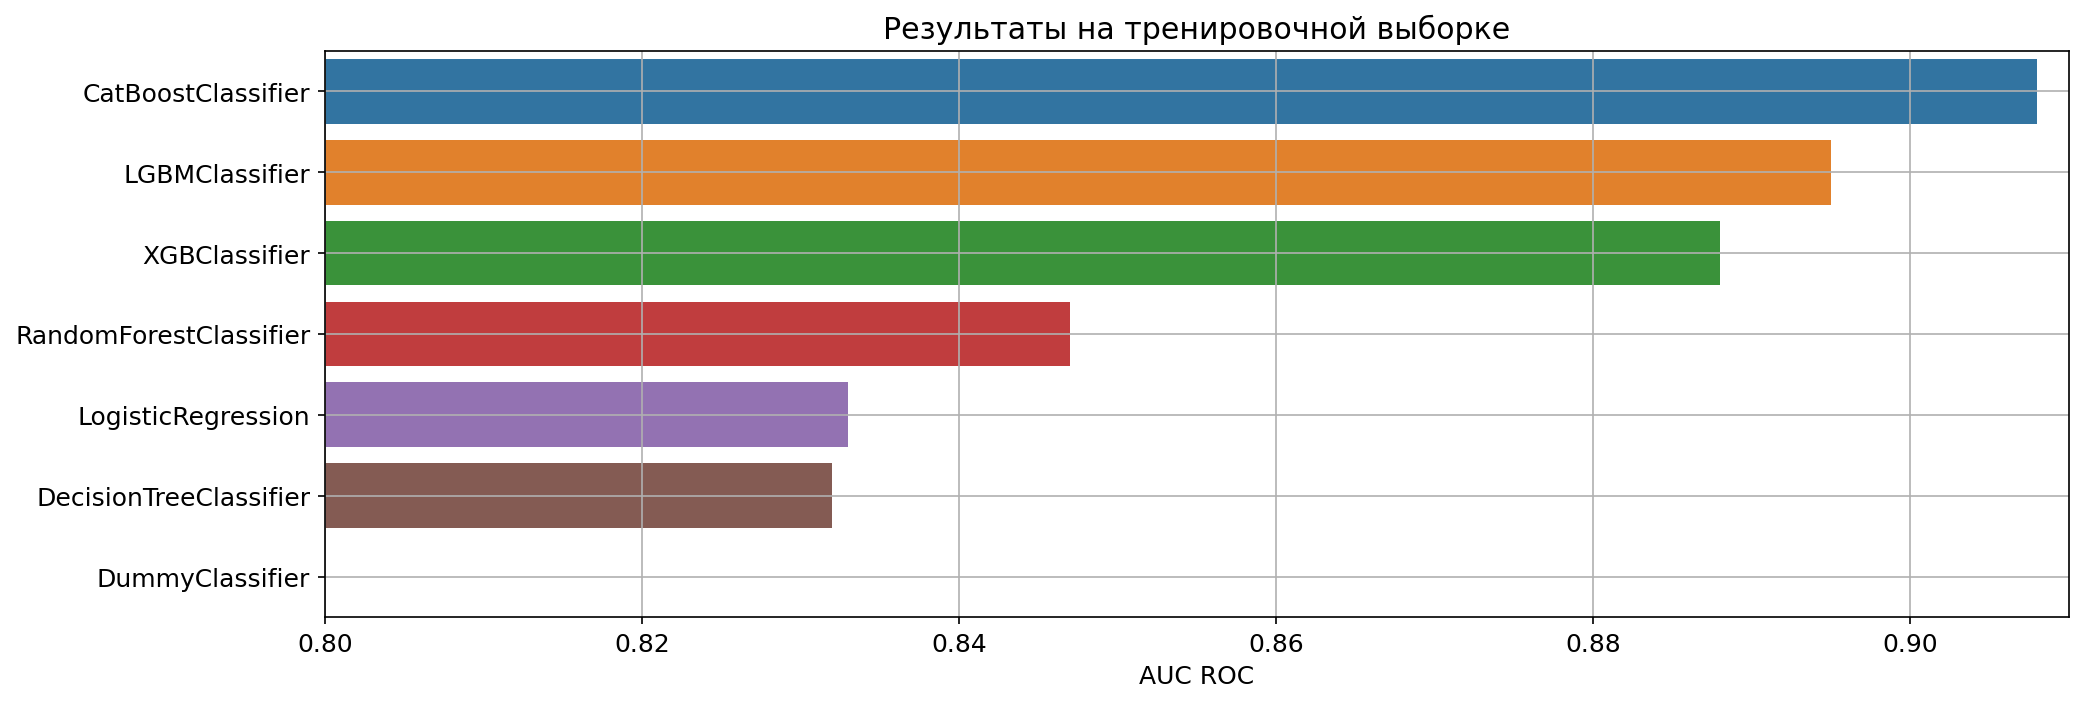

<a id='part_4_6'></a>
## 4.6 Результаты тестирования [▴](#head)

Лучше результаты на тренировочной выборке дала модель `CatBoostClassifier`, ее мы и использользовали в финальном тесте.

Вот результаты, которые модель показала:

AUC ROC - `train`|AUC ROC - `test`|Accuracy - `test`|Гиперпараметры
-|-|-|-
`0.908`|`0.942`|`0.88`|`{'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}`

### ROC - кривая

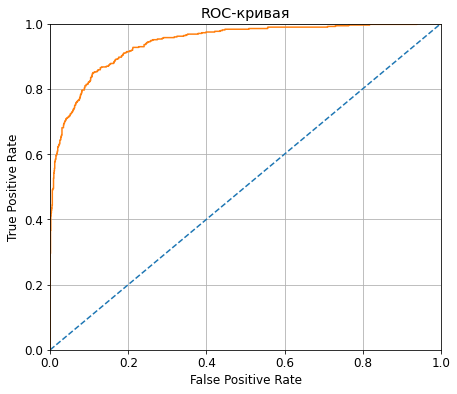

### Матрица ошибок

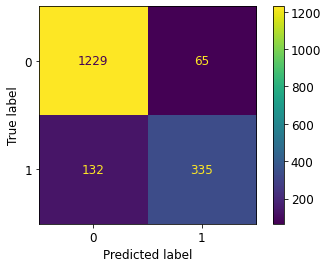

- Истинно отрицательных ответов `1229` шт.
- Истинно положительных ответов `335` шт.
- Ложно отрицательных ответов `132` шт.
- Ложно положительных ответов `65` шт.

### PrecisionRecall - кривая

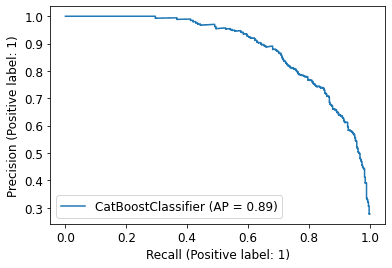

### Важность признаков

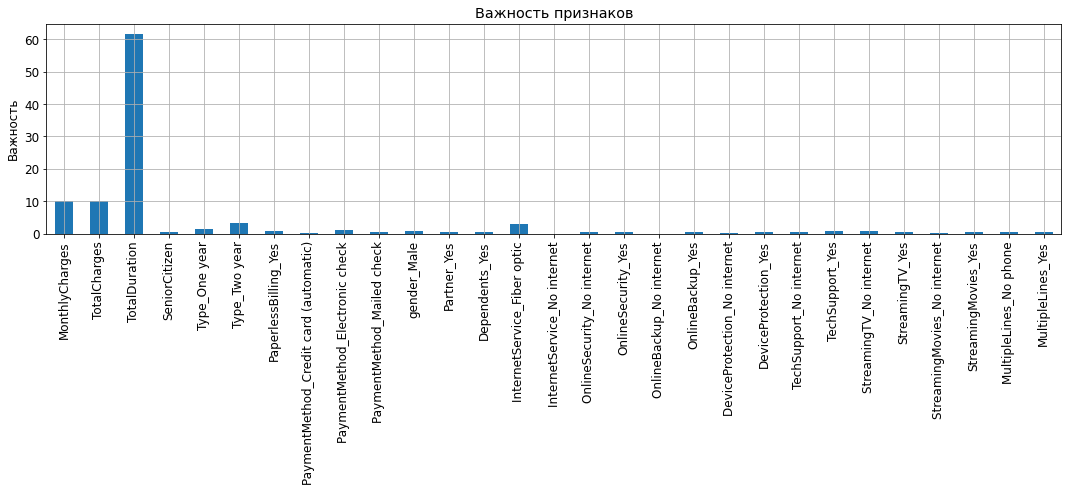

- Признаки, которые выше всего оказывают влияние на нашу модель:
    - `TotalDuration` - влияние многократно выше, чем у других признаков
    - `MonthlyCharges`
    - `TotalCharges`
- Признаки, которые немного оказывают влияния на нашу модель:
    - `Type` (тип контракта)
    - `InternetService`

<a id='part_4_7'></a>
## 4.7 Выводы [▴](#head)

В ходе выполнения проекта мы выяснили, что основной отток клиентов у оператора, это новые клиенты, которые пользовались услугами буквально один месяц. Исходя из этого, можно рекомендовать оператору каким-то образом повлиять на условия для новых клиентов, чтобы у клиента было больше мотивация остаться. Тем более, что у оператора основная часть аудитории это клиенты которые пользуются услугами несколько лет, то есть со стабильностью у оператора проблем нет.

Для прогнозирования ухода клиента можно использовать нашу модель, которая показала очень неплохое качество предсказания.

На этом всё!

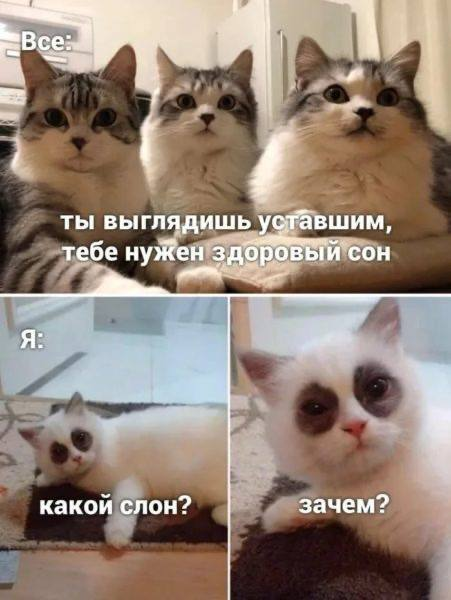

In [84]:
full_stop = time.time()
notebook_time = full_stop - full_start
print(f'Общее время выполнения тетрадки: {notebook_time / 60:.2f} минут')

Общее время выполнения тетрадки: 1.67 минут
